In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data = pd.read_csv("Train_B_Tree.csv")

In [47]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [48]:
data.shape

(1030, 9)

In [49]:
data[data.duplicated()==True]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [50]:
data = data.drop_duplicates(keep='first')

In [51]:
data.shape

(1005, 9)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [53]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [54]:
data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [55]:
data.shape

(1005, 9)

In [56]:
X = data.drop(['csMPa'],axis=1)
X.shape

(1005, 8)

In [57]:
y = data.csMPa
y.shape

(1005,)

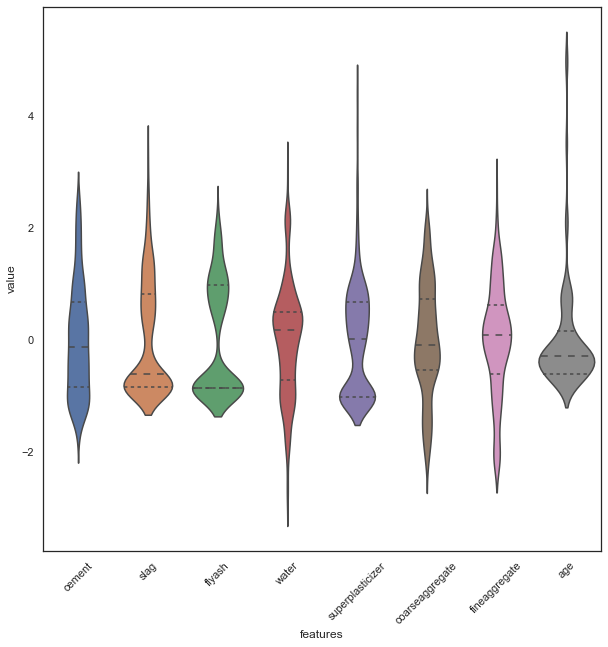

In [63]:
data_vis = (X - X.mean()) / (X.std())              # standardization
data_vis = pd.concat([y,data_vis],axis=1)
data_vis = pd.melt(data_vis,id_vars="csMPa",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data_vis, inner="quart")
plt.xticks(rotation=45);

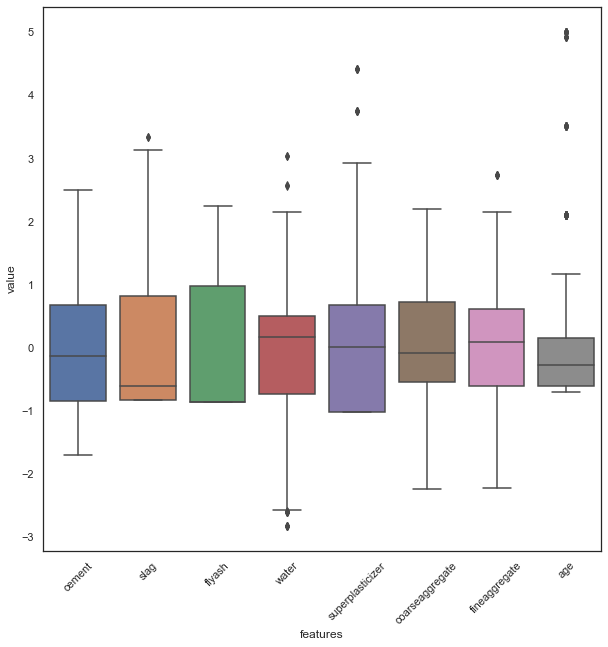

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", data=data_vis)
plt.xticks(rotation=45);

<Figure size 1800x1800 with 0 Axes>

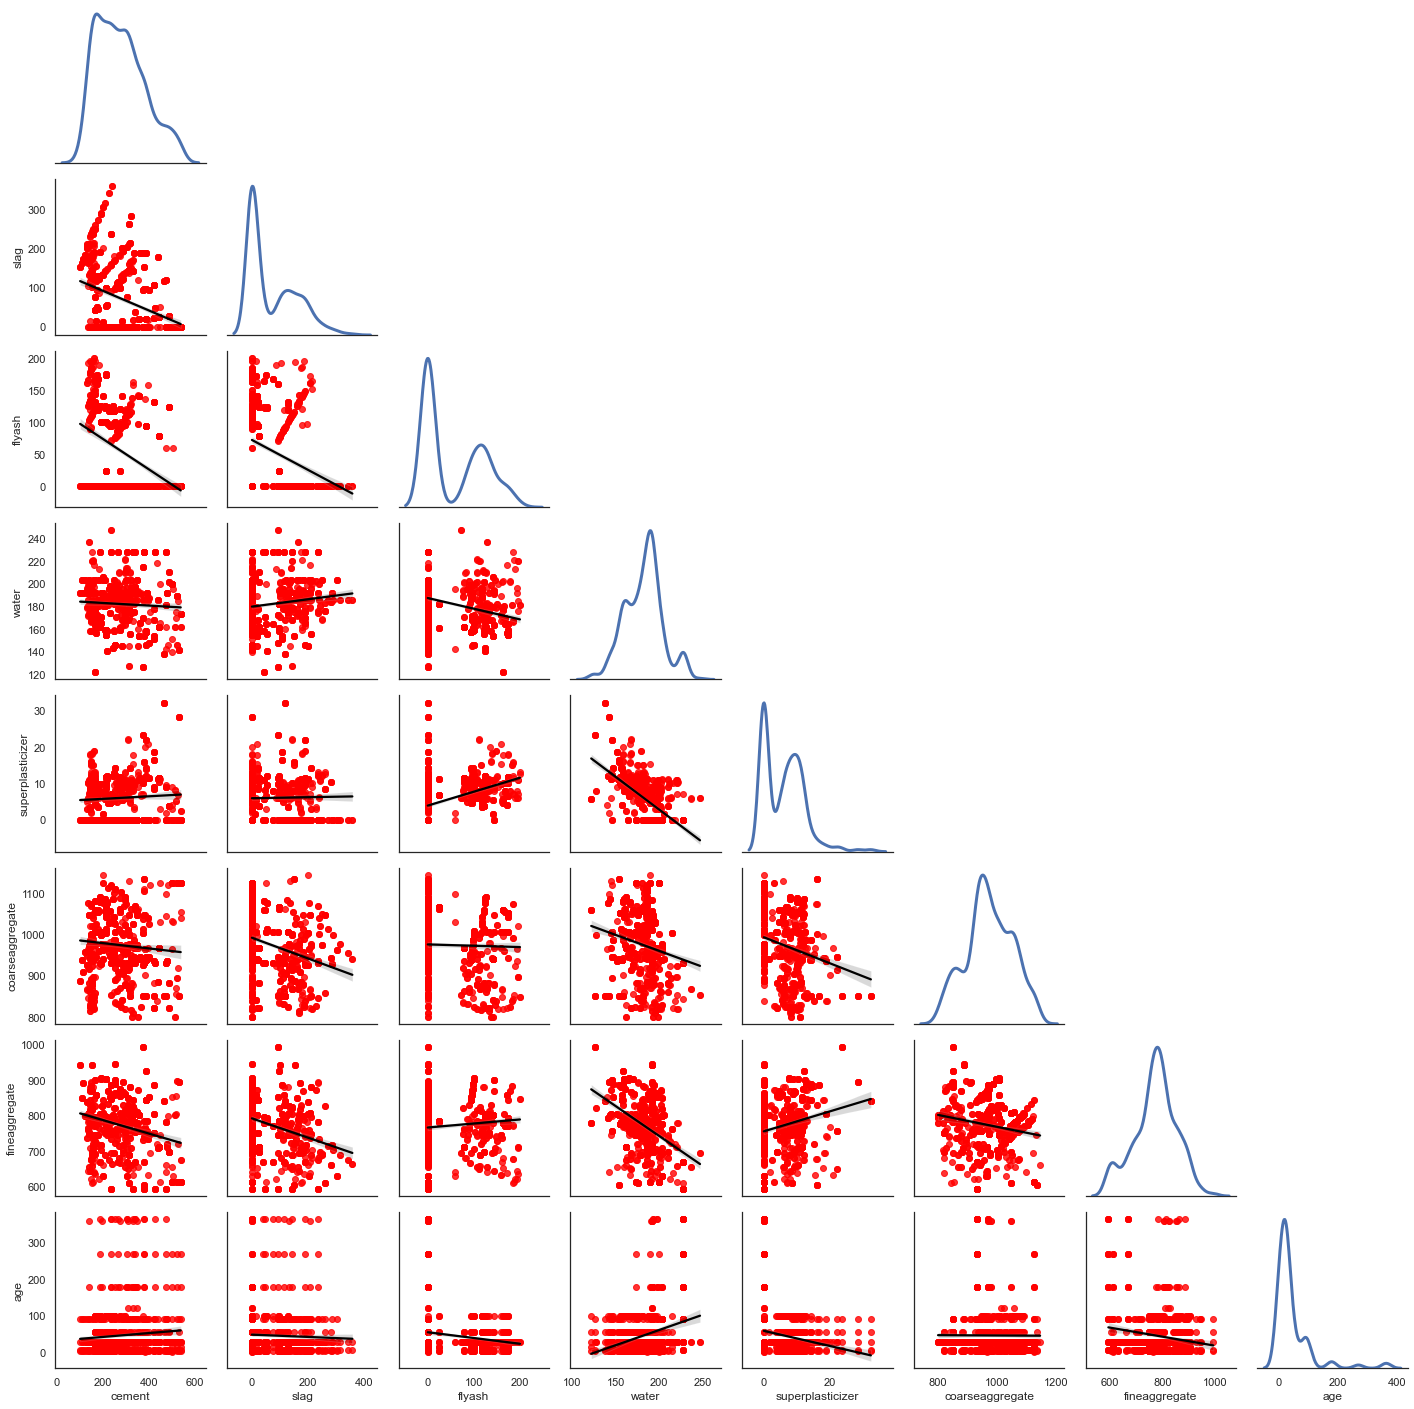

In [60]:
plt.figure(figsize=(25,25))
sns.set(style="white")
df = X.loc[:,['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
g = sns.PairGrid(df, diag_sharey=False,corner=True);
g.map_lower(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "black"});
g.map_diag(sns.kdeplot, lw=3);

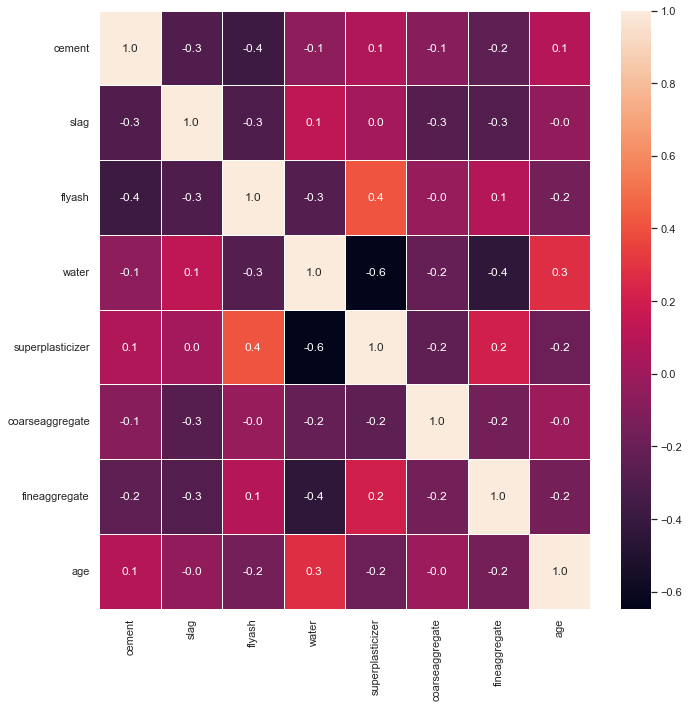

In [61]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

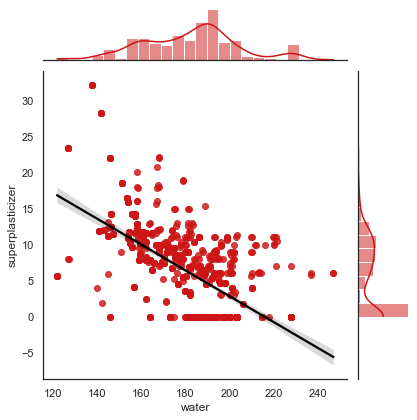

In [62]:
sns.jointplot(x = df.loc[:,'water'],
              y = df.loc[:,'superplasticizer'],
              kind="reg",
              color="#ce1414",line_kws={"color": "black"});

In [65]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [89]:
data = data.sample(frac = 1)
div = int(0.7 * data.shape[0])
data_train, data_test = data.iloc[:div,:], data.iloc[div:,:]

In [90]:
data_train.shape

(703, 9)

In [91]:
data_test.shape

(302, 9)

In [92]:
data_train_y = data_train.pop('csMPa')
data_train_x = data_train
data_test_y = data_test.pop('csMPa')
data_test_x = data_test

Two types of nodes: leaf nodes and decision nodes

In [96]:
class Node():
        def __init__(self, feature_index=None,threshold=None,left=None,right=None,var_redcution=None,value=None):
            #variables relevant to decision nodes
            self.feature_index = feature_index #which feature is acting as spliiting condition
            self.threshold = threshold #threhold corresponding to that feature
            self.left = left#left child of node
            self.right = right#right child of node
            self.var_reduction = var_reduction#variance reduction caused due to splitting 
            
            #variable relevant to leaf node
            self.value = value

In [2]:
class DecisionTree():
    #define constructor
    def __init__(self,min_sample_split=2,max_depth=10):
        self.root = None #root node of decision tree
        slef.min_sample_splits = min_sample_splits
        self.max_depth = max_depth
        
    def build_tree(self,X,y,curr_depth=0):
        num_samples,num_features = X.shape()
        best_split = {}
        if(num_sample>=)